PRIMERA ENTREGA (Carga de datos y visualización)

ESTUDIANTES: Alejandro Giraldo Cardona y Sebastián Parra Maldonado

In [5]:
#Librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn import preprocessing
from sklearn import datasets
from sklearn.datasets.samples_generator import make_blobs
from sklearn.linear_model import LogisticRegression

#Keras
import tensorflow as tf
from tensorflow import keras

%matplotlib inline

Utilizamos estas funciones para obtener una mejor gráfica y visualizar los datos de salida de una manera más intuitiva.


In [9]:
file_path = '/content/data/fashion-mnist_train.csv' #Datos Fashion
file_data = pd.read_csv(file_path)

In [10]:
#Datos del archivo
file_data

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,0,0,105,92,101,107,100,132,0,0,2,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,150,...,211,220,214,74,0,255,222,128,0,0,0,0,0,0,0,0,0,44,12,0,0,40,134,162,191,214,163,146,165,79,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,0,114,183,112,55,23,72,102,165,160,28,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,24,188,163,93,...,171,249,207,197,202,45,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,22,21,25,69,52,45,74,39,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,0,0,0,46,0,21,68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,187,189,...,230,237,229,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,68,116,112,136,147,144,121,102,63,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,0,83,155,136,116,148,110,118,67,32,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,118,...,199,165,108,108,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,32,159,6,91,0,0,85,159,0,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,0,1,0,0,87,114,77,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,...,228,229,231,231,218,230,255,0,0,0,0,0,0,0,0,0,0,0,116,140,147,166,176,174,173,173,174,173,177,164,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [11]:
#Set de datos
labels = file_data.iloc[:,0].to_numpy()
names = ['Camiseta','Pantalón','Buso','Vestido','Chaqueta','Chancleta','Camisa','Zapatilla','Bolso','Bota']
data=file_data.drop(['label'], axis=1)
df = pd.DataFrame(data=data)
image = df.values.reshape(60000,28,28)
image.shape

(60000, 28, 28)

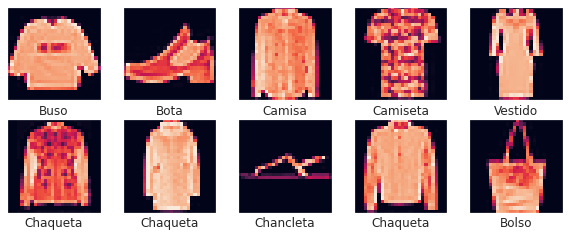

In [12]:
#Figuras obtenidas del set de datos
plt.figure(figsize=(10,10))
for i in range(10):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(image[i])
  #print(names[labels[i]])
  plt.xlabel(names[labels[i]])
plt.show()

SEGUNDA ENTREGA (Entrenamiento)

ESTUDIANTES: Alejandro Giraldo Cardona y Sebastián Parra Maldonado

Para entrenar el modelo decidimos usar keras, ya que nos permitía manejar más dimensiones que los otros modelos vistos.

La primera capa de esta red en el modelo es: keras.layers.Flatten, la cual transforma el formato de las imágenes de un arreglo bi-dimensional (de 28*28px) a uno unidimensional de 784px.
La primera capa (keras.layers.Dense) tiene 128 nodos, la segunda (y última) capa, es una capa de 10 nodos (softmax) que devuelve un arreglo de 10 probabilidades que suman a 1. Cada nodo contiene una calificacion que indica la probabilidad que la actual imagen pertenece a una de las 10 tipos de prenda.

In [13]:
#Se crea una variable con el modelo de datos de las prendas de vestir
#Este se utiliza para realizar el entrenamiento de los datos
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

Hacemos unas configuraciones más al modelo.
Con optimizer, hacemos que el modelo se actualice basado en el set de datos que ve y la función de perdida.
Con la función loss, medimos qué tan exacto es el modelo durante el entrenamiento.
Con el último parámetro, lo usamos para monitorear los pasos del entrenamiento y de pruebas, para el que usamos accuracy.

In [14]:
# Compilamos el modelo, con nuevas configuraciones.
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
#Entrenamiento del modelo
model.fit(image, labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 9.7517 - accuracy: 0.6860
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7933 - accuracy: 0.7214
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7044 - accuracy: 0.7313
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6545 - accuracy: 0.7446
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6505 - accuracy: 0.7426
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6107 - accuracy: 0.7533
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6061 - accuracy: 0.7534
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5949 - accuracy: 0.7595
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5811 - accuracy: 0.7670
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.556

TERCERA ENTREGA (Predicción)

ESTUDIANTES: Alejandro Giraldo Cardona y Sebastián Parra Maldonado

In [16]:
#Realizamos la predicción del modelo.
prediction = model.predict(image)

Realizamos la gráfica de cada prenda y la predicción de esta, siendo el nombre que predice el modelo, la exactitud, y lo que está en paréntesis, el nombre correcto de la prenda.

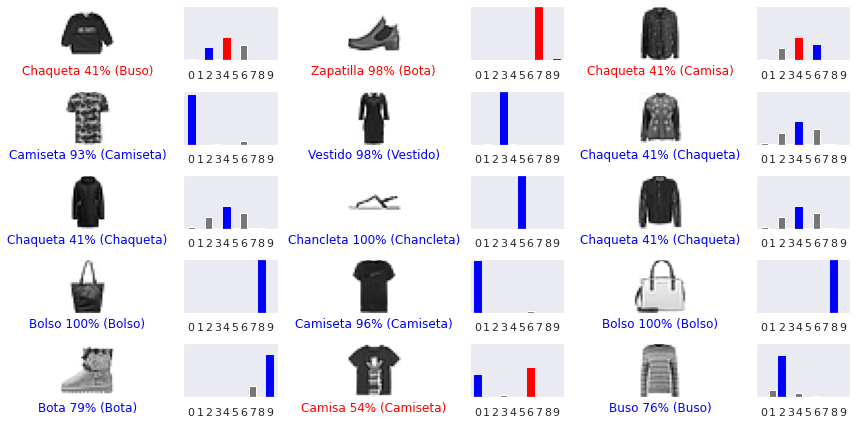

In [20]:
#Grafica de revisión
plt.figure(figsize=(12,6))
for i in range(15):
  plt.subplot(5, 6, 2*i+1)
  plot_image(i, prediction[i], labels, image)
  plt.subplot(5, 6, 2*i+2)
  plot_value_array(i, prediction[i],  labels)
plt.tight_layout()
plt.show()